import Importing neede libraries for preprocessing and model budiling 



In [49]:
import nltk
import io
import re
import pandas as pd
import numpy as np
import networkx as nx
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
from nltk.corpus import stopwords
from nltk.cluster.util import cosine_distance
from nltk.tokenize import sent_tokenize
nltk.download('punkt') # one time execution
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')
!pip install googletrans==3.1.0a0
from googletrans import Translator, constants

import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
     |████████████████████████████████| 61kB 3.2MB/s 
     |████████████████████████████████| 1.0MB 7.4MB/s 
     |████████████████████████████████| 51kB 5.3MB/s 
     |████████████████████████████████| 71kB 5.4MB/s 
     |████████████████████████████████| 61kB 4.8MB/s 
  Created wheel for googletrans: filename=googletrans-3.1.0a0-cp37-none-any.whl size=16368 sha256=f0b3bb9de3bc0d7a2c2048a1154eee2ebf4cf5750a28e418c798f9abd6a1f761
  Stored in directory: /root/.cache/pip/wheels/27/7a/a0/aff3babbb775549ce6813cb8fa7ff3c0848c4dc62c20f8fdac
Successfully built googletrans


In [ ]:

#import of stnadarod data set 
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove*.zip

read in dataset and look at it 

In [17]:

#df = pd.read_csv("/content/ChristopherNolan.txt")
#print(type(df)) # this type is pandas.core.frame.DataFrame
#df.head()


# this mehtod is a bit more nautral sense we are reading in the full next.
# other method to read in articles 
txt = "/content/ChristopherNolan.txt"

# opening and converting read in files to use able form 
txt = open(txt, "r")
text_sring = txt.read()
print(type(text_sring))
print(text_sring)


<class 'str'>
LOS ANGELES—Visibly exhausted from his hours-long binge, Christopher Nolan was reportedly still no closer to understanding the end of Tenet Tuesday after watching dozens of YouTube explainer videos. “Wait, so what the hell was that turnstile thingy?” said Nolan, pausing a 35-minute long video and rubbing his eyes as he compared the elaborate diagram on screen to the copy he had scrawled down on a napkin in front of him. “It’s like some kind of time machine? That lets the nameless man run backward? And Robert Pattinson is a little boy? Either I’m stupid, or this plot makes no sense. I’ve watched, like, nine videos on the temporal pincer alone, and I still can’t make heads or tails of it. Jesus Christ, this is so convoluted. It’s almost worse than Inception.” At press time, Nolan admitted that The Prestige was the last one of his movies that he had really understood.


In [18]:
# sentence tokinization 
sentences = []
for s in df:
  sentences.append(s)
  
#checking tokinization output 
print(sentences[:9])


# old code for loading the data set 
#df.text = df['text']
#df2 =  df.text[:100] # this was used to greatly reduce the size of the data set becuase it kept crashing coblab


['LOS ANGELES—Visibly exhausted from his hours-long binge', ' Christopher Nolan was reportedly still no closer to understanding the end of Tenet Tuesday after watching dozens of YouTube explainer videos. “Wait', ' so what the hell was that turnstile thingy?” said Nolan', ' pausing a 35-minute long video and rubbing his eyes as he compared the elaborate diagram on screen to the copy he had scrawled down on a napkin in front of him. “It’s like some kind of time machine? That lets the nameless man run backward? And Robert Pattinson is a little boy? Either I’m stupid', ' or this plot makes no sense. I’ve watched', ' like', ' nine videos on the temporal pincer alone', ' and I still can’t make heads or tails of it. Jesus Christ', ' this is so convoluted. It’s almost worse than Inception.” At press time']


In [21]:
# remove punctuations, numbers and special characters
clean_sentences = pd.Series(sentences).str.replace("[^a-zA-Z]", " ")
clean_sentences = [s.lower() for s in clean_sentences]

#remove stopwords from the sentences
def remove_stopwords(sen):
    sen_new = " ".join([i for i in sen if i not in stop_words])
    return sen_new

# remove stopwords from the sentences
clean_sentences = [remove_stopwords(r.split()) for r in clean_sentences]

In [22]:
# Extract word vectors
word_embeddings = {}
f = open('glove.6B.100d.txt', encoding='utf-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    word_embeddings[word] = coefs
f.close()

In [23]:
sentence_vectors = []
for i in clean_sentences:
  if len(i) != 0:
    v = sum([word_embeddings.get(w, np.zeros((100,))) for w in i.split()])/(len(i.split())+0.001)
  else:
    v = np.zeros((100,))
  sentence_vectors.append(v)

In [24]:
# similarity matrix
sim_mat = np.zeros([len(sentences), len(sentences)])

for i in range(len(sentences)):
  for j in range(len(sentences)):
    if i != j: #ignore if both are same sentences
        # trying different kinds of cosin simularity 
        # sim_mat[i][j] = sentence_similarity(sentences[i], sentences[ij], stop_words)
        sim_mat[i][j] = cosine_similarity(sentence_vectors[i].reshape(1,100), sentence_vectors[j].reshape(1,100))[0,0]

In [43]:
nx_graph = nx.from_numpy_array(sim_mat)
scores = nx.pagerank(nx_graph)
ranked_sentences = sorted(((scores[i],s) for i,s in enumerate(sentences)), reverse=True)

#  evertyihng is compiling but the summary look the same as the original text  
print("the total number of sentences is", len(sentences))
print("quick ouput of first 5 sentence to compare to first 10 from the ranking")
print(sentences[0])
print(sentences[1])
print(sentences[2])
print(sentences[3])
print(sentences[4])
clound_sentences = " "
# Extract top 10 sentences as the summary
for i in range(10):
  print("--------------")
  print("ranked senctence number", i)
  print(ranked_sentences[i][1])
  clound_sentences += ranked_sentences[i][1]
  

the total number of sentences is 10
quick ouput of first 5 sentence to compare to first 10 from the ranking
LOS ANGELES—Visibly exhausted from his hours-long binge
 Christopher Nolan was reportedly still no closer to understanding the end of Tenet Tuesday after watching dozens of YouTube explainer videos. “Wait
 so what the hell was that turnstile thingy?” said Nolan
 pausing a 35-minute long video and rubbing his eyes as he compared the elaborate diagram on screen to the copy he had scrawled down on a napkin in front of him. “It’s like some kind of time machine? That lets the nameless man run backward? And Robert Pattinson is a little boy? Either I’m stupid
 or this plot makes no sense. I’ve watched
--------------
ranked senctence number 0
 pausing a 35-minute long video and rubbing his eyes as he compared the elaborate diagram on screen to the copy he had scrawled down on a napkin in front of him. “It’s like some kind of time machine? That lets the nameless man run backward? And Robe

(-0.5, 399.5, 199.5, -0.5)

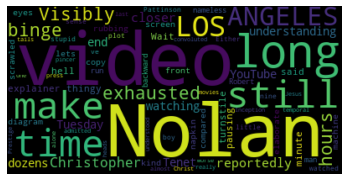

In [46]:
# word clounds for original text 
wordCloud = WordCloud().generate(text_sring)
plt.imshow(wordCloud, interpolation = 'bilinear')
plt.axis("off")




(-0.5, 399.5, 199.5, -0.5)

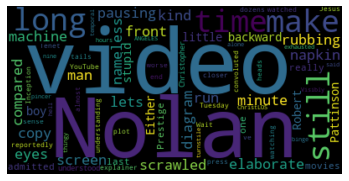

In [47]:
# clound for ranked sentences 
wordCloud = WordCloud().generate(clound_sentences)
plt.imshow(wordCloud, interpolation = 'bilinear')
plt.axis("off")

In [52]:
translator = Translator() #Google API translator
#Translates automatically from spanish to english, to translate differentlanguage, 
#translator.translate("Phrase", dest = "language code")

translation = translator.translate(clound_sentences, dest = "fr")
print(f"{translation.origin} ({translation.src}) --> {translation.text}({translation.dest})")

  pausing a 35-minute long video and rubbing his eyes as he compared the elaborate diagram on screen to the copy he had scrawled down on a napkin in front of him. “It’s like some kind of time machine? That lets the nameless man run backward? And Robert Pattinson is a little boy? Either I’m stupid Nolan admitted that The Prestige was the last one of his movies that he had really understood. Christopher Nolan was reportedly still no closer to understanding the end of Tenet Tuesday after watching dozens of YouTube explainer videos. “Wait or this plot makes no sense. I’ve watched this is so convoluted. It’s almost worse than Inception.” At press time like and I still can’t make heads or tails of it. Jesus ChristLOS ANGELES—Visibly exhausted from his hours-long binge nine videos on the temporal pincer alone so what the hell was that turnstile thingy?” said Nolan (en) --> mettant en pause une vidéo de 35 minutes et se frottant les yeux alors qu'il comparait le diagramme élaboré à l'écran à l

In [42]:
# looks like the tuples includes the simmularity score 
# I think 
print(type(ranked_sentences))
print(len(ranked_sentences))
print(type(ranked_sentences[1]))
print(ranked_sentences[9])

<class 'list'>
10
<class 'tuple'>
(0.07852935091130768, ' so what the hell was that turnstile thingy?” said Nolan')
